In [1]:
import tensorflow as tf
import os

In [2]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
import cv2
#help to read all image extension
import imghdr

In [4]:
data_dr="data"

In [5]:
image_exts=['jpeg','jpg','bmp','png']

In [7]:
os.listdir(data_dr)
os.listdir(os.path.join(data_dr,'Amphibians','Chameleon'))

['africa-1170042__340.jpg',
 'africa-1170043__340.jpg',
 'animal-1840529__340.jpg',
 'animal-2116631__340.jpg',
 'animal-256844__340.jpg',
 'animal-2610766__340.jpg',
 'animal-2657793__340.png',
 'animal-2907__340.jpg',
 'animal-3249231__340.jpg',
 'animal-342406__340.jpg',
 'animal-7285343__340.jpg',
 'animal-7285346__340.jpg',
 'animal-81888__340.jpg',
 'animal-931556__340.jpg',
 'animals-1060602__340.jpg',
 'animals-1060604__340.jpg',
 'animals-1060608__340.jpg',
 'animals-1098676__340.jpg',
 'animals-1098679__340.jpg',
 'animals-3306054__340.jpg',
 'animals-3306055__340.jpg',
 'calango-3737742__340.jpg',
 'calotes-versicolor-4811291__340.jpg',
 'calotes-versicolor-4882744__340.jpg',
 'chameleon-101103__340.jpg',
 'chameleon-101106__340.jpg',
 'chameleon-101267__340.jpg',
 'chameleon-1154440__340.jpg',
 'chameleon-1154457__340.jpg',
 'chameleon-1169745__340.jpg',
 'chameleon-1193682__340.jpg',
 'chameleon-1222050__340.jpg',
 'chameleon-1235145__340.jpg',
 'chameleon-1316390__340.jpg

In [8]:
img=cv2.imread(os.path.join(data_dr,'Amphibians','Chameleon','africa-1170042__340.jpg'))

In [11]:
os.path.join(data_dr,'Amphibians','Chameleon','africa-1170042__340.jpg')

'data\\Amphibians\\Chameleon\\africa-1170042__340.jpg'

In [20]:
imghdr.what(img)

AttributeError: 'numpy.ndarray' object has no attribute 'tell'

In [22]:
for image_class1 in os.listdir(data_dr):
    for image_class in os.listdir(os.path.join(data_dr,image_class1)):
        for image in os.listdir(os.path.join(data_dr,image_class1,image_class)):
            image_path=os.path.join(data_dr,image_class1,image_class,image)
            try:
                imag=cv2.imread(image_path)
                tip=imghdr.what(image_path)
                if tip not in image_exts:
                    print('issue with image ',format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('issue with image',format(image_path))    

issue with image data\birde\test\ABBOTTS BABBLER
issue with image data\birde\test\ABBOTTS BOOBY
issue with image data\birde\test\ABYSSINIAN GROUND HORNBILL
issue with image data\birde\test\AFRICAN CROWNED CRANE
issue with image data\birde\test\AFRICAN EMERALD CUCKOO
issue with image data\birde\test\AFRICAN FIREFINCH
issue with image data\birde\test\AFRICAN OYSTER CATCHER
issue with image data\birde\test\AFRICAN PIED HORNBILL
issue with image data\birde\test\AFRICAN PYGMY GOOSE
issue with image data\birde\test\ALBATROSS
issue with image data\birde\test\ALBERTS TOWHEE
issue with image data\birde\test\ALEXANDRINE PARAKEET
issue with image data\birde\test\ALPINE CHOUGH
issue with image data\birde\test\ALTAMIRA YELLOWTHROAT
issue with image data\birde\test\AMERICAN AVOCET
issue with image data\birde\test\AMERICAN BITTERN
issue with image data\birde\test\AMERICAN COOT
issue with image data\birde\test\AMERICAN DIPPER
issue with image data\birde\test\AMERICAN FLAMINGO
issue with image data\bir

In [23]:
data = tf.keras.utils.image_dataset_from_directory(data_dr)

Found 185790 files belonging to 4 classes.


In [25]:
data_iterator=data.as_numpy_iterator()

In [28]:
batch =data_iterator.next()

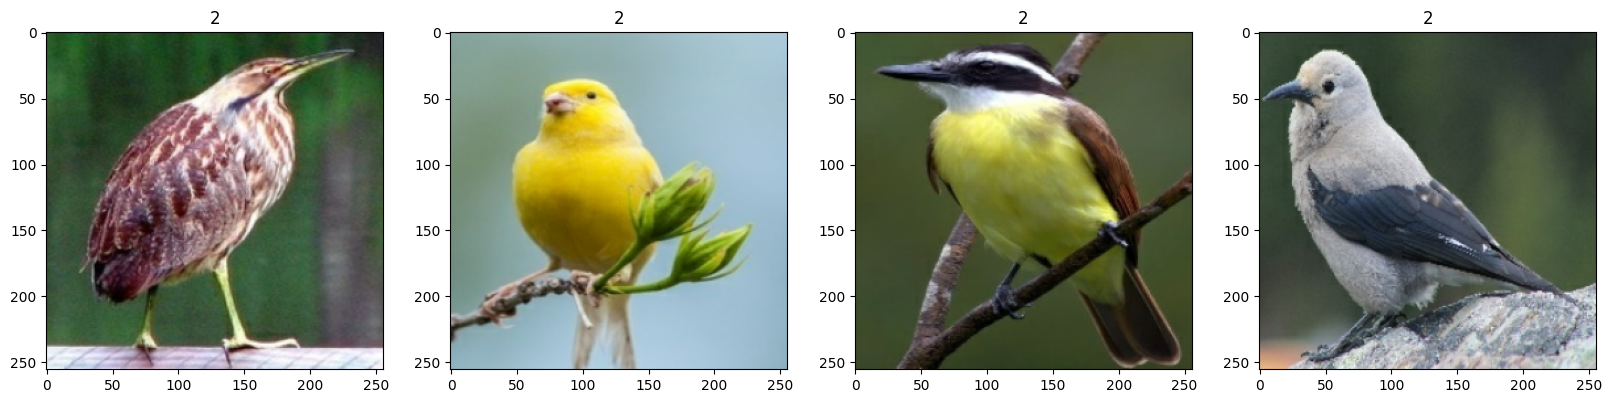

In [36]:
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx ,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
data=data.map(lambda x,y: (x/255, y))

In [33]:
print ("max",data.as_numpy_iterator().next()[0].max(),"min",
data.as_numpy_iterator().next()[0].min())

max 1.0 min 0.0


In [34]:
batch=data.as_numpy_iterator().next()
batch[0].shape

(32, 256, 256, 3)

In [37]:
train_size=int(len(data)*.7)
val_size= int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [38]:
len(data)==train_size+val_size+test_size

True

In [39]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test= data.skip(train_size+val_size).take(test_size)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model=Sequential()

In [75]:
num_classes=4

In [76]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  
])

In [60]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model.summary()
# data = tf.keras.utils.image_dataset_from_directory(data_dr, batch_size=32, image_size=(256, 256))

# # Check the number of classes
# num_classes = len(data.class_names)
# print("Number of classes:", num_classes)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 128)     

In [80]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up TensorBoard callback
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Assuming `train` and `val` are your training and validation datasets
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
3943/4064 [============================>.] - ETA: 4:50 - loss: 0.1593 - accuracy: 0.9536

InvalidArgumentError: Graph execution error:

jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_6548]